In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mustafaali96/weight-height")

print("Path to dataset files:", path)

100%|██████████| 167k/167k [00:00<00:00, 43.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mustafaali96/weight-height/versions/1


In [4]:
df = pd.read_csv(path + "/weight-height.csv")

In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df.drop('Gender',axis=1,inplace=True)

In [8]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [8]:
# prompt: swap the columns in the table, weight as first column and height as second

# Assuming df is your DataFrame
new_df = df[['Weight', 'Height']]
new_df.head()

,Weight,Height
0,241.893563,73.847017
1,162.310473,68.781904
2,212.740856,74.110105
3,220.042470,71.730978
4,206.349801,69.881796


###Scatter plot

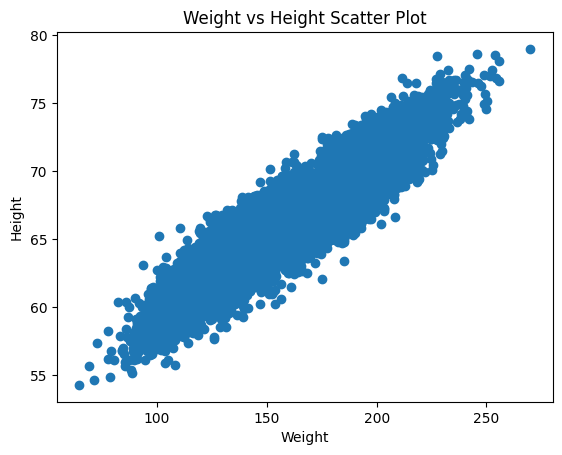

In [9]:
plt.scatter(new_df['Weight'], new_df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height Scatter Plot')
plt.show()

In [10]:
new_df.corr()

,Weight,Height
Weight,1.000000,0.924756
Height,0.924756,1.000000


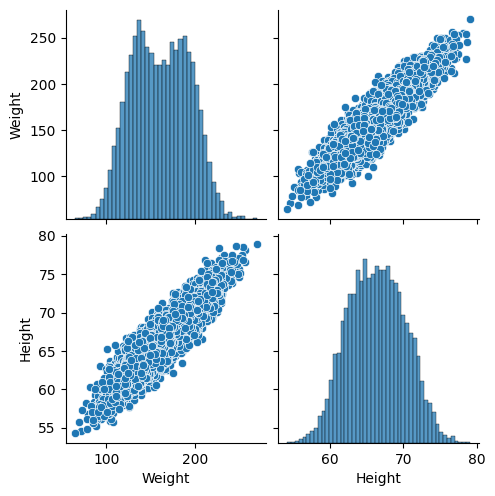

In [11]:
## seaborn for visualization
import seaborn as sns
sns.pairplot(new_df)

In [12]:
X = new_df[['Weight']]
y = new_df['Height']


In [14]:
# train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
X_train.shape

(7500, 1)

In [16]:
y_train.shape

(7500,)

In [18]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
## apply linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
lr.coef_

array([3.5520765])

In [21]:
lr.intercept_

66.34834766149207

In [22]:
lr.n_features_in_

1

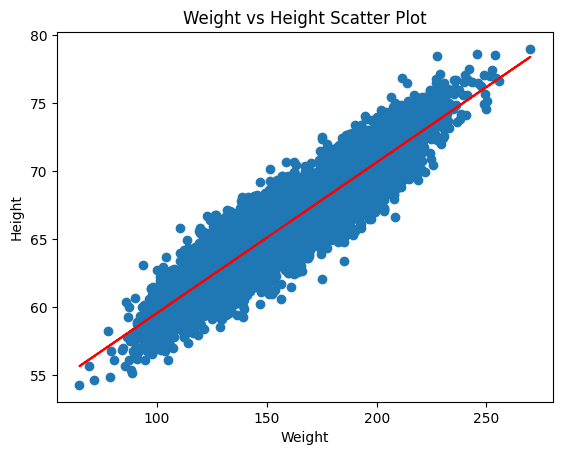

In [23]:
# plot training data plot best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train_scaled), color='red')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height Scatter Plot')
plt.show()


prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test=156.470 + 17.29(X_test)

In [24]:
#prediction for the test data
y_pred = lr.predict(X_test_scaled)

In [26]:
#performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 2.1245002931280457
Mean Absolute Error: 1.16186862410503
Root Mean Squared Error: 1.4575665655907608


##R square Formula
**R^2=1 - SSR/SST**


R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.857428881104187

Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]
where:
R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
n = len(y_test)
k = 1
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R2:", adjusted_r2)

Adjusted R2: 0.8573718069973433


OLS LR

In [29]:
## OLS Linear regression
import statsmodels.api as sm

model = sm.OLS(y_train, X_train_scaled)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              21.48
Date:                Wed, 16 Oct 2024   Prob (F-statistic):                    3.63e-06
Time:                        18:12:04   Log-Likelihood:                         -42106.
No. Observations:                7500   AIC:                                  8.421e+04
Df Residuals:                    7499   BIC:                                  8.422e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
results.predict(X_test_scaled)

array([ 1.3183849 ,  3.7639285 ,  0.99687554, ..., -4.1451931 ,
        0.45415466,  0.20823876])